**Bike Sharing Assignment**

In [147]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score


import warnings
warnings.filterwarnings('ignore')

In [148]:
# Importing Dataset
dataset = pd.read_csv('C:/Users/enittom/Desktop/ML A to Z/Upgrad/Boom Bike Sharing Linear Regression Assignment/day.csv')

**Basic Check of the Data**

In [149]:
dataset.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [150]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


In [151]:
dataset.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [152]:
dataset.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [153]:
dataset.shape

(730, 16)

In [154]:
# Checking missing or null values
dataset.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**EDA on Bike Data to get more Clarity**

In [155]:
# To have clear understanding plots and trends, lets convert Month, weather, season and weekdays in there actual name
dataset.season = dataset.season.map({1:'Spring',2:'Summer',3: 'Fall',4: 'Winter'})
dataset.mnth = dataset.mnth.map({1: 'Jan',2: 'Feb',3: 'Mar',4: 'April',5: 'May',6: 'June',7: 'July',8: 'Aug',9: 'Sep',10: 'Oct',11: 'Nov',12: 'Dec'})
dataset.weekday = dataset.weekday.map({0: 'Tue',1: 'Wed',2: 'Thu',3: 'Fri',4: 'Sat',5: 'Sun',6: 'Mon'})
dataset.weathersit = dataset.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Heavy Rain'})

In [156]:
dataset.head()

instant      dteday  season  yr mnth  holiday weekday  workingday  \
0        1  01-01-2018  Spring   0  Jan        0     Mon           0   
1        2  02-01-2018  Spring   0  Jan        0     Tue           0   
2        3  03-01-2018  Spring   0  Jan        0     Wed           1   
3        4  04-01-2018  Spring   0  Jan        0     Thu           1   
4        5  05-01-2018  Spring   0  Jan        0     Fri           1   

      weathersit       temp     atemp      hum  windspeed  casual  registered  \
0  Mist + Cloudy  14.110847  18.18125  80.5833  10.749882     331         654   
1  Mist + Cloudy  14.902598  17.68695  69.6087  16.652113     131         670   
2          Clear   8.050924   9.47025  43.7273  16.636703     120        1229   
3          Clear   8.200000  10.60610  59.0435  10.739832     108        1454   
4          Clear   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [157]:
dataset.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
instant       730
dteday        730
dtype: int64

**Yr, Holiday, Waethersit,season,weekday,mnth seems to be categorical variables rest seems to be continuous variables**

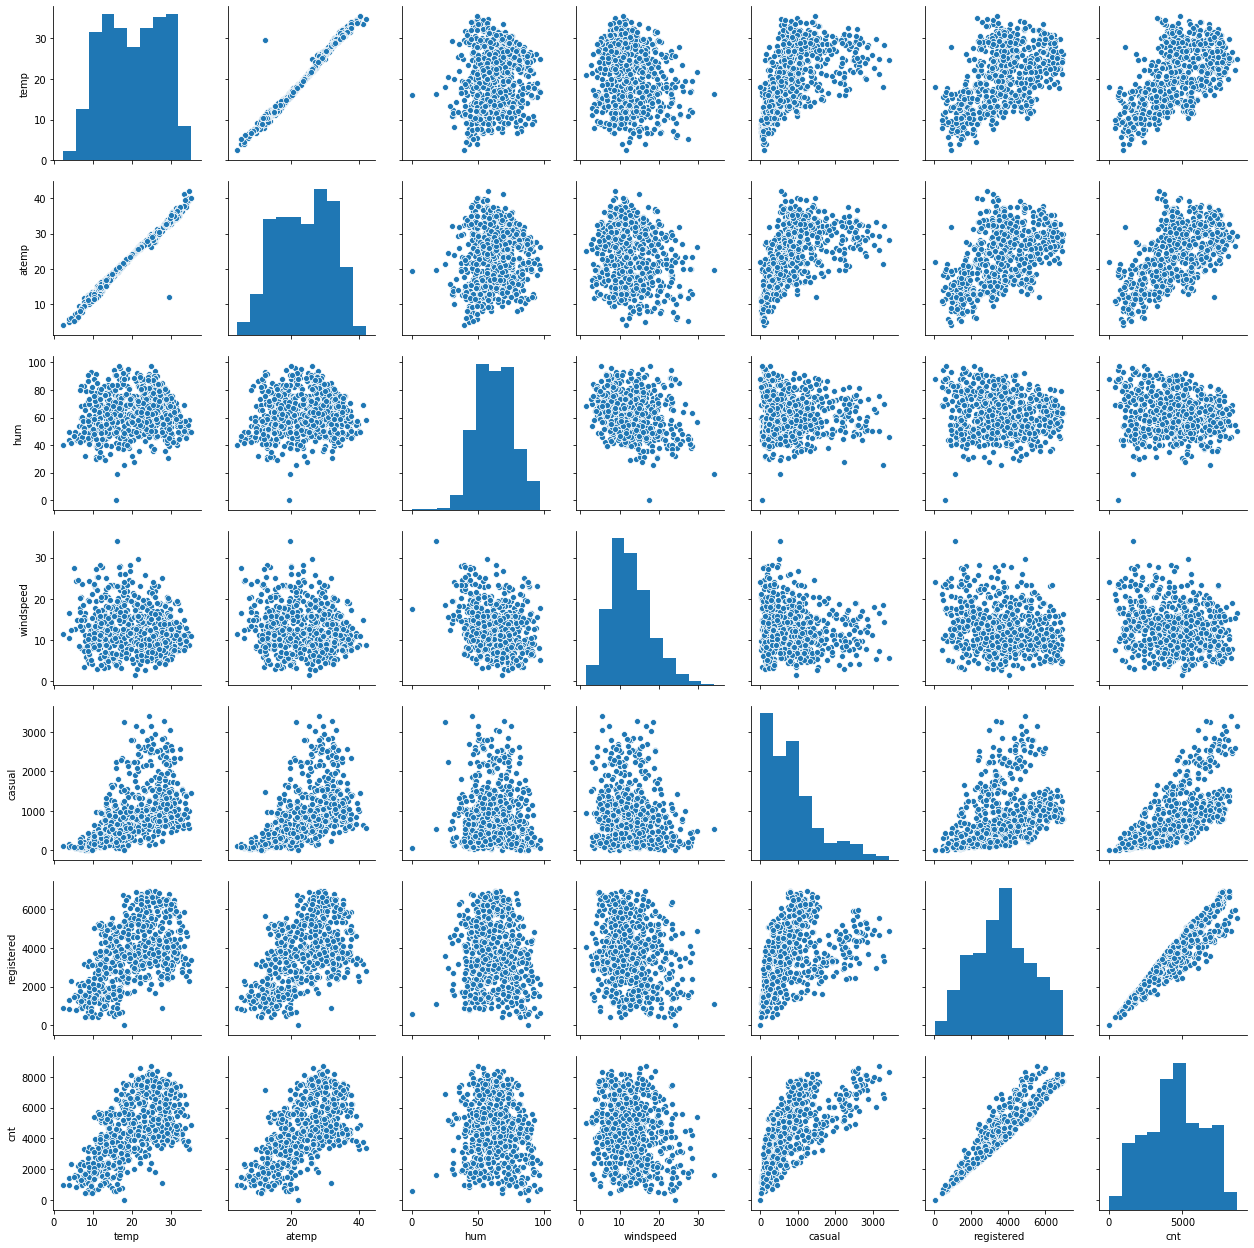

In [158]:
sns.pairplot(dataset, vars = ['temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'])

**It is clear from the paiplot that there are few variables coorelated with count**

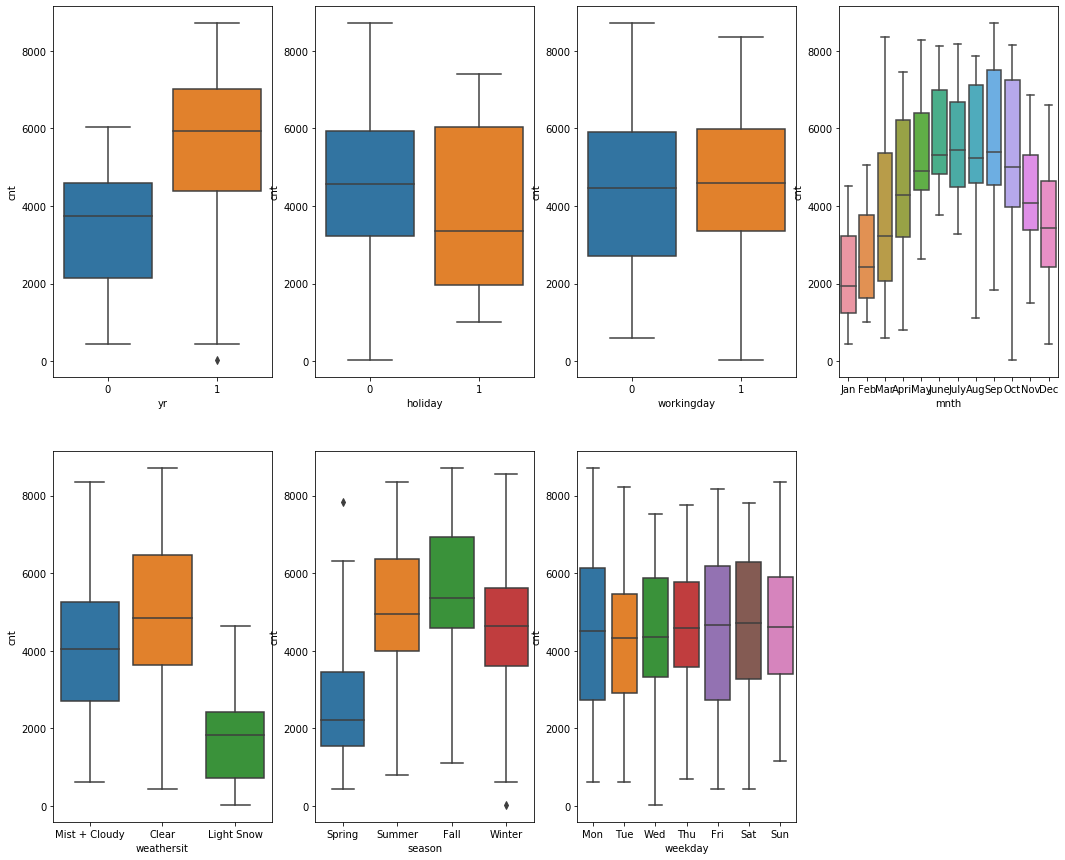

In [159]:
#Lets do analysis using Box plot for categorical values and Count
plt.figure(figsize=(18,15))
plt.subplot(2,4,1)
sns.boxplot(x = 'yr',y = 'cnt',data = dataset)
plt.subplot(2,4,2)
sns.boxplot(x = 'holiday',y = 'cnt',data = dataset)
plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = dataset)
plt.subplot(2,4,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = dataset)
plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = dataset)
plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'cnt', data = dataset)
plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'cnt', data = dataset)
plt.show()

**Few Observations from Boxplots**

*1) Year 1 is having high bike count and that too on holidays*

*2) Peak can be seen at month of Aug Sep and Oct*

*3) Clear weather seems to be more spike and Fall winter sees more count*

*4) In term of days,Fri, Sat and Mon are having more count*

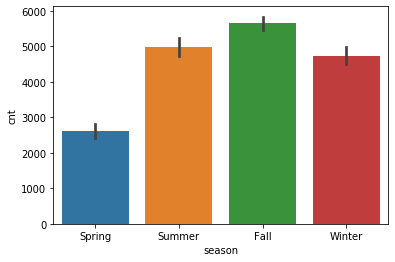

In [160]:
# Lets do analysis using barplots
sns.barplot(x = 'season',y = 'cnt',data = dataset)
plt.show()

**Season 'Fall' has high count of rental bikes**

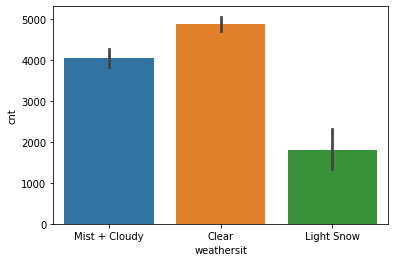

In [161]:
sns.barplot(x = 'weathersit',y = 'cnt',data = dataset)
plt.show()

**When weather is clear, Count seems to be High**

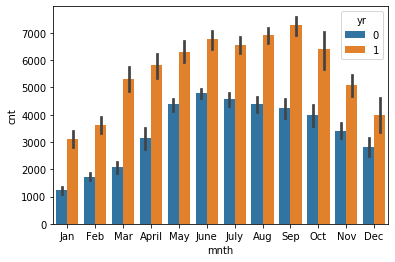

In [162]:
sns.barplot(x = 'mnth',y = 'cnt',hue = 'yr',data = dataset)
plt.show()

**When compared with Year, for 2018 spike seems to be in June and July, however, for year 2019 spike seems to be from June till Sep**

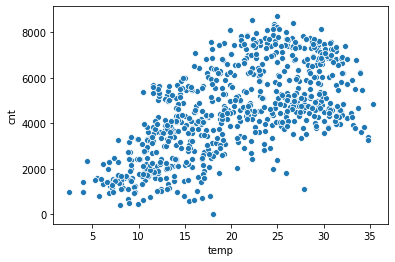

In [163]:
sns.scatterplot(x = 'temp',y = 'cnt',data = dataset)
plt.show()

**Linear relationship seems to be between Count and Temp**

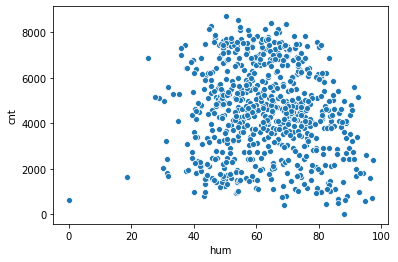

In [164]:
sns.scatterplot(x='hum', y='cnt',data= dataset)
plt.show()

**With the rise in humidity, bike count increases**

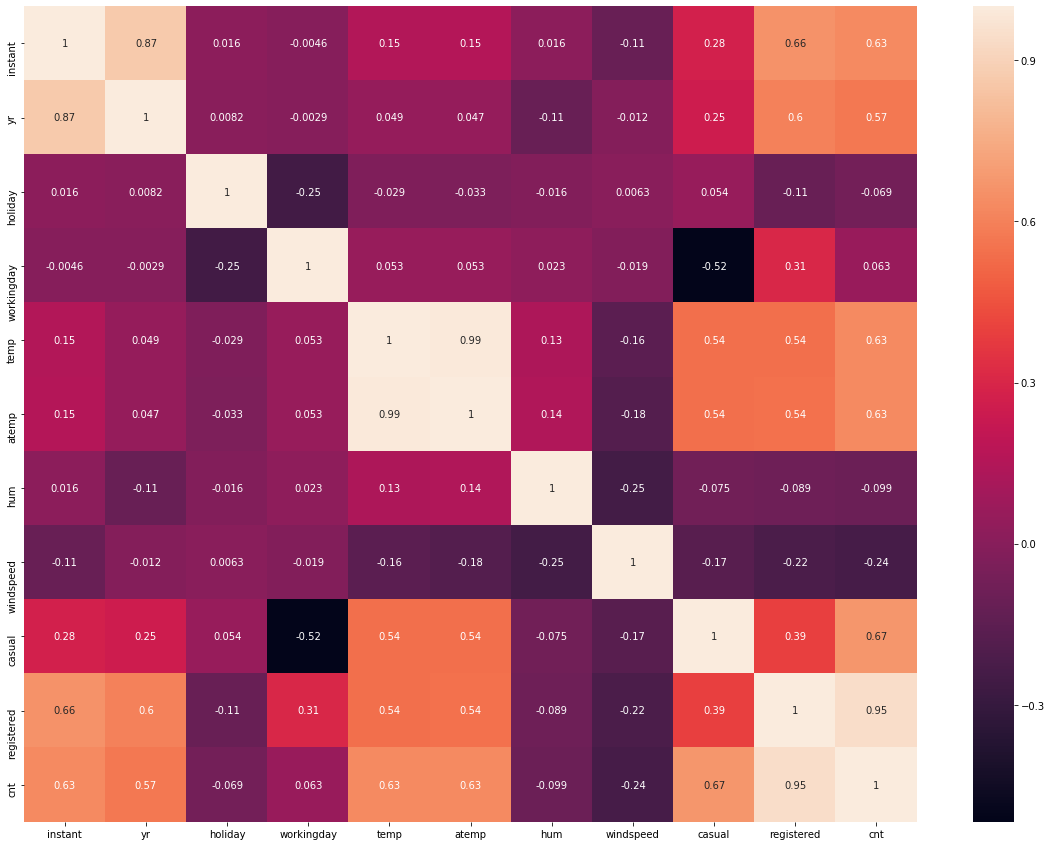

In [165]:
plt.figure(figsize=(20,15))
sns.heatmap(dataset.corr(),annot = True)
plt.show()

***So from the above heatmaps, pairplot and scatter plots, variable atemp,temp,yr***
***are fairly coorelated with count***
***And we can see linear relationship between few independent and dependent variables***



**Data Preparation**


In [166]:
dataset.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [167]:
# Getting dummy variable for Categoical values and concatenating with Database also dropping unnecessary columns
month = pd.get_dummies(dataset.mnth,drop_first=True)
seasons = pd.get_dummies(dataset.season,drop_first=True)
weekdays = pd.get_dummies(dataset.weekday,drop_first=True)
weathersits = pd.get_dummies(dataset.weathersit,drop_first=True)

In [168]:
dataset=pd.concat([month,weekdays,weathersits,seasons,dataset],axis=1)
dataset.head()

Aug  Dec  Feb  Jan  July  June  Mar  May  Nov  Oct  ...  weekday  \
0    0    0    0    1     0     0    0    0    0    0  ...      Mon   
1    0    0    0    1     0     0    0    0    0    0  ...      Tue   
2    0    0    0    1     0     0    0    0    0    0  ...      Wed   
3    0    0    0    1     0     0    0    0    0    0  ...      Thu   
4    0    0    0    1     0     0    0    0    0    0  ...      Fri   

   workingday     weathersit       temp     atemp      hum  windspeed  casual  \
0           0  Mist + Cloudy  14.110847  18.18125  80.5833  10.749882     331   
1           0  Mist + Cloudy  14.902598  17.68695  69.6087  16.652113     131   
2           1          Clear   8.050924   9.47025  43.7273  16.636703     120   
3           1          Clear   8.200000  10.60610  59.0435  10.739832     108   
4           1          Clear   9.305237  11.46350  43.6957  12.522300      82   

   registered   cnt  
0         654   985  
1         670   801  
2        1229  1349  
3        1454  1562  
4        1518  1600  

[5 rows x 38 columns]

In [169]:
dataset.drop(['season','mnth','weekday','weathersit','instant','dteday','casual', 'registered','atemp'], axis = 1, inplace = True)
dataset.head()

Aug  Dec  Feb  Jan  July  June  Mar  May  Nov  Oct  ...  Spring  Summer  \
0    0    0    0    1     0     0    0    0    0    0  ...       1       0   
1    0    0    0    1     0     0    0    0    0    0  ...       1       0   
2    0    0    0    1     0     0    0    0    0    0  ...       1       0   
3    0    0    0    1     0     0    0    0    0    0  ...       1       0   
4    0    0    0    1     0     0    0    0    0    0  ...       1       0   

   Winter  yr  holiday  workingday       temp      hum  windspeed   cnt  
0       0   0        0           0  14.110847  80.5833  10.749882   985  
1       0   0        0           0  14.902598  69.6087  16.652113   801  
2       0   0        0           1   8.050924  43.7273  16.636703  1349  
3       0   0        0           1   8.200000  59.0435  10.739832  1562  
4       0   0        0           1   9.305237  43.6957  12.522300  1600  

[5 rows x 29 columns]

In [170]:
dataset.shape

(730, 29)

***Train and Test Split of Dataset***

In [171]:
dataset_train, dataset_test = train_test_split(dataset, test_size = 0.3,random_state = 101)

In [172]:
# Rescaling features using Min Max scaler(Normalization)
scaler = MinMaxScaler()
feature = ['temp','hum','windspeed','cnt']
dataset_train[feature] = scaler.fit_transform(dataset_train[feature])
dataset_train.head()
dataset_train.describe()

Aug         Dec         Feb         Jan        July       June  \
count  511.000000  511.000000  511.000000  511.000000  511.000000  511.00000   
mean     0.076321    0.086106    0.078278    0.088063    0.084149    0.09002   
std      0.265771    0.280795    0.268872    0.283664    0.277883    0.28649   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.00000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.00000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.00000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.00000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.00000   

              Mar         May         Nov         Oct  ...      Spring  \
count  511.000000  511.000000  511.000000  511.000000  ...  511.000000   
mean     0.088063    0.088063    0.074364    0.084149  ...    0.254403   
std      0.283664    0.283664    0.262619    0.277883  ...    0.435952   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
50%      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
75%      0.000000    0.000000    0.000000    0.000000  ...    1.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

           Summer      Winter          yr     holiday  workingday        temp  \
count  511.000000  511.000000  511.000000  511.000000  511.000000  511.000000   
mean     0.252446    0.240705    0.510763    0.027397    0.677104    0.542737   
std      0.434842    0.427930    0.500374    0.163398    0.468042    0.229057   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.344266   
50%      0.000000    0.000000    1.000000    0.000000    1.000000    0.529616   
75%      1.000000    0.000000    1.000000    0.000000    1.000000    0.742483   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              hum   windspeed         cnt  
count  511.000000  511.000000  511.000000  
mean     0.560023    0.342299    0.524973  
std      0.180277    0.162782    0.227477  
min      0.000000    0.000000    0.000000  
25%      0.425718    0.225010    0.375542  
50%      0.563898    0.317960    0.526075  
75%      0.690894    0.434622    0.692312  
max      1.000000    1.000000    1.000000  

[8 rows x 29 columns]

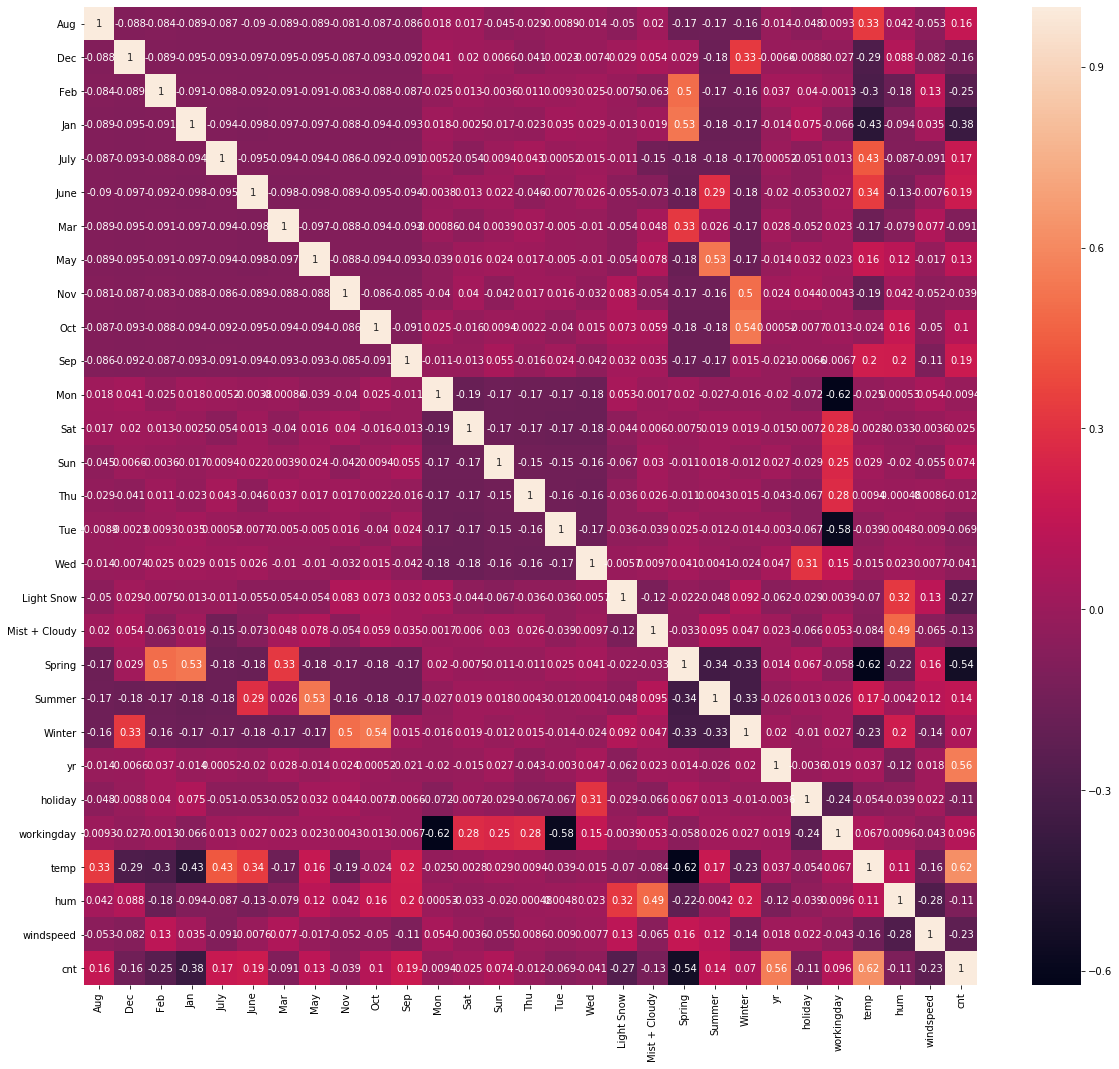

In [173]:
# Checking of Mulitcolliearity)
plt.figure(figsize=(20,18))
sns.heatmap(dataset_train.corr(),annot = True)
plt.show()

**Can see some level of multi collinearity**

**Model Building**

In [174]:
X_train = dataset_train
y_train = dataset_train.pop('cnt')

In [175]:
X_train.shape

(511, 28)

In [176]:
y_train.shape

(511,)

In [177]:
# Linear Regression fitting to train and test set
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [178]:
# Will use RFE for feature elemination
rfe = RFE(lr,15)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', False, 14),
 ('Dec', False, 3),
 ('Feb', False, 13),
 ('Jan', False, 5),
 ('July', True, 1),
 ('June', False, 10),
 ('Mar', True, 1),
 ('May', False, 4),
 ('Nov', True, 1),
 ('Oct', False, 9),
 ('Sep', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 12),
 ('Sun', False, 11),
 ('Thu', False, 8),
 ('Tue', False, 2),
 ('Wed', False, 7),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 6),
 ('Winter', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [179]:
# Will take those columns where ref supports
col = X_train.columns[rfe.support_]
col

Index(['July', 'Mar', 'Nov', 'Sep', 'Mon', 'Light Snow', 'Mist + Cloudy',
       'Spring', 'Winter', 'yr', 'holiday', 'workingday', 'temp', 'hum',
       'windspeed'],
      dtype='object')

**Building Model Using statsmodel**

In [180]:
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)

In [181]:
lr = sm.OLS(y_train,X_train_rfe).fit()

In [182]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     166.4
Date:                Tue, 06 Apr 2021   Prob (F-statistic):          2.97e-182
Time:                        18:23:32   Log-Likelihood:                 491.65
No. Observations:                 511   AIC:                            -951.3
Df Residuals:                     495   BIC:                            -883.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3152      0.032      9.760      0.000       0.252       0.379
July             -0.0719      0.017     -4.145      0.000      -0.106      -0.038
Mar               0.0521      0.016      3.316      0.001       0.021       0.083
Nov              -0.0473      0.019     -2.521      0.012      -0.084      -0.010
Sep               0.0569      0.016      3.535      0.000       0.025       0.089
Mon               0.0488      0.015      3.166      0.002       0.019       0.079
Light Snow       -0.2391      0.030     -8.106      0.000      -0.297      -0.181
Mist + Cloudy    -0.0564      0.012     -4.896      0.000      -0.079      -0.034
Spring           -0.1350      0.016     -8.343      0.000      -0.167      -0.103
Winter            0.0691      0.014      4.923      0.000       0.042       0.097
yr                0.2366      0.009     27.812      0.000       0.220       0.253
holiday          -0.0720      0.028     -2.603      0.010      -0.126      -0.018
workingday        0.0362      0.012      2.934      0.004       0.012       0.060
temp              0.4577      0.033     14.020      0.000       0.394       0.522
hum              -0.1505      0.034     -4.398      0.000      -0.218      -0.083
windspeed        -0.1807      0.028     -6.356      0.000      -0.236      -0.125
==============================================================================
Omnibus:                       70.671   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.806
Skew:                          -0.757   Prob(JB):                     6.59e-34
Kurtosis:                       5.210   Cond. No.                         19.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [183]:
#Nov is having slightly high P value, so can be dropped

X_train_1 = X_train_rfe.drop(['Nov'],axis = 1)
X_train_1.columns

Index(['const', 'July', 'Mar', 'Sep', 'Mon', 'Light Snow', 'Mist + Cloudy',
       'Spring', 'Winter', 'yr', 'holiday', 'workingday', 'temp', 'hum',
       'windspeed'],
      dtype='object')

In [184]:
X_train_lr1 = sm.add_constant(X_train_1)
lr1 = sm.OLS(y_train,X_train_lr1).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     175.9
Date:                Tue, 06 Apr 2021   Prob (F-statistic):          5.09e-182
Time:                        18:23:45   Log-Likelihood:                 488.39
No. Observations:                 511   AIC:                            -946.8
Df Residuals:                     496   BIC:                            -883.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3053      0.032      9.473

**Checking variables correlation using VIF**


In [185]:
X_train_lr1.head()

const  July  Mar  Sep  Mon  Light Snow  Mist + Cloudy  Spring  Winter  \
53     1.0     0    0    0    0           0              0       1       0   
117    1.0     0    0    0    0           0              1       0       0   
712    1.0     0    0    0    0           0              0       0       1   
60     1.0     0    1    0    0           0              0       1       0   
72     1.0     0    1    0    0           0              0       1       0   

     yr  holiday  workingday      temp       hum  windspeed  
53    0        0           1  0.202618  0.300481   0.147857  
117   0        0           1  0.695756  0.655484   0.615407  
712   1        0           1  0.277292  0.581470   0.224374  
60    0        0           1  0.343747  0.334397   0.588452  
72    0        0           1  0.331557  0.394939   0.236118

In [186]:
# dropping const column
X_train_lr1 = X_train_lr1.drop(['const'],axis = 1)

In [187]:
# calulating VIF
vif = pd.DataFrame()
data = X_train_lr1
vif['Features']  = data.columns
vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
12            hum  16.95
11           temp  14.39
10     workingday   5.40
13      windspeed   4.80
6          Spring   2.65
5   Mist + Cloudy   2.43
8              yr   2.10
7          Winter   2.03
3             Mon   2.02
0            July   1.46
4      Light Snow   1.39
1             Mar   1.26
2             Sep   1.22
9         holiday   1.19

**Hum (humidity) VIF is quite high, so can be dropped**




In [188]:
X_train_2 = X_train_lr1.drop(['hum'],axis = 1)


In [189]:
# Need to build new model
X_train_lr2 = sm.add_constant(X_train_2)
lr2 = sm.OLS(y_train,X_train_lr2).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     181.4
Date:                Tue, 06 Apr 2021   Prob (F-statistic):          4.01e-179
Time:                        18:24:02   Log-Likelihood:                 478.77
No. Observations:                 511   AIC:                            -929.5
Df Residuals:                     497   BIC:                            -870.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2312      0.028      8.292

In [190]:
# Dropping the constant and calculating new VIF
X_train_lr2 = X_train_lr2.drop(['const'],axis = 1)

In [191]:
# Calculating the VIF for new model
vif = pd.DataFrame()
X = X_train_lr2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
11           temp  7.35
10     workingday  5.33
12      windspeed  4.79
6          Spring  2.09
8              yr  2.07
3             Mon  2.00
5   Mist + Cloudy  1.52
7          Winter  1.52
0            July  1.43
1             Mar  1.26
2             Sep  1.21
9         holiday  1.18
4      Light Snow  1.10

**Need to drop temp due to high VIF, but since temp is having good coorelation with count, then we need to skip this and will** **drop workingday**

In [192]:
X_train_3 = X_train_lr2.drop(['workingday'],axis = 1)

In [193]:
# Need to build new model
X_train_lr3 = sm.add_constant(X_train_3)
lr3 = sm.OLS(y_train,X_train_lr3).fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     192.0
Date:                Tue, 06 Apr 2021   Prob (F-statistic):          4.71e-178
Time:                        18:24:24   Log-Likelihood:                 473.49
No. Observations:                 511   AIC:                            -921.0
Df Residuals:                     498   BIC:                            -865.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2597      0.027      9.734

In [194]:
X_train_lr3 = X_train_lr3.drop(['const'],axis = 1)

In [195]:
# Calculating the VIF for new model
vif = pd.DataFrame()
X = X_train_lr3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
10           temp  5.07
11      windspeed  4.64
8              yr  2.07
6          Spring  1.86
5   Mist + Cloudy  1.49
0            July  1.42
7          Winter  1.38
1             Mar  1.26
2             Sep  1.20
3             Mon  1.19
4      Light Snow  1.09
9         holiday  1.05

**Need to remove Mon due to high P value**

In [196]:
X_train_4 = X_train_lr3.drop(['Mon'],axis = 1)

In [197]:
# Need to build new model
X_train_lr4 = sm.add_constant(X_train_4)
lr4 = sm.OLS(y_train,X_train_lr4).fit()
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     208.5
Date:                Tue, 06 Apr 2021   Prob (F-statistic):          1.27e-178
Time:                        18:25:18   Log-Likelihood:                 472.06
No. Observations:                 511   AIC:                            -920.1
Df Residuals:                     499   BIC:                            -869.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2629      0.027      9.861

In [198]:
X_train_lr5 = X_train_lr4.drop(['const'],axis = 1)

In [199]:
# Calculating the VIF for new model
vif = pd.DataFrame()
X = X_train_lr5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
9            temp  5.03
10      windspeed  4.60
7              yr  2.07
5          Spring  1.85
4   Mist + Cloudy  1.49
0            July  1.42
6          Winter  1.38
1             Mar  1.26
2             Sep  1.20
3      Light Snow  1.09
8         holiday  1.05

**Now P value and VIF is in acceptable range**

**R sq value seems to be quite good**

**Low p value means we are fail to accept null hypothesis**

In [200]:
# Need to build new model
X_train_lr6 = sm.add_constant(X_train_4)
lr6 = sm.OLS(y_train,X_train_lr4).fit()
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     208.5
Date:                Tue, 06 Apr 2021   Prob (F-statistic):          1.27e-178
Time:                        18:25:52   Log-Likelihood:                 472.06
No. Observations:                 511   AIC:                            -920.1
Df Residuals:                     499   BIC:                            -869.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2629      0.027      9.861

In [201]:
X_train_lr6.head()


const  July  Mar  Sep  Light Snow  Mist + Cloudy  Spring  Winter  yr  \
53     1.0     0    0    0           0              0       1       0   0   
117    1.0     0    0    0           0              1       0       0   0   
712    1.0     0    0    0           0              0       0       1   1   
60     1.0     0    1    0           0              0       1       0   0   
72     1.0     0    1    0           0              0       1       0   0   

     holiday      temp  windspeed  
53         0  0.202618   0.147857  
117        0  0.695756   0.615407  
712        0  0.277292   0.224374  
60         0  0.343747   0.588452  
72         0  0.331557   0.236118

<Figure size 432x288 with 0 Axes>

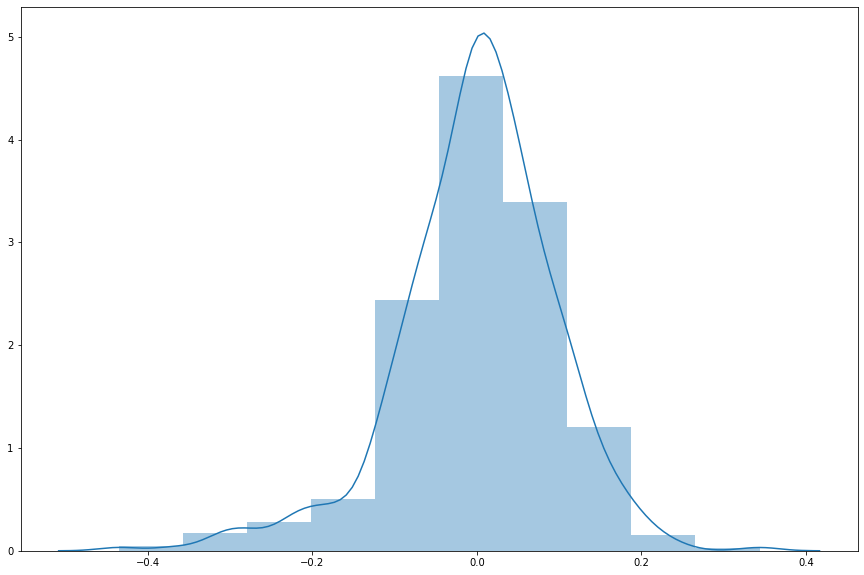

In [202]:
y_train_pred = lr6.predict(X_train_lr6)
fig = plt.figure()
plt.figure(figsize=(15,10))
sns.distplot((y_train - y_train_pred), bins = 10)

**Error terms are normally distributed**

In [203]:
#Applying Scaling in test set
feature = ['temp','hum','windspeed','cnt']
dataset_test[feature] = scaler.transform(dataset_test[feature])
dataset_test.head()

Aug  Dec  Feb  Jan  July  June  Mar  May  Nov  Oct  ...  Spring  Summer  \
299    0    0    0    0     0     0    0    0    0    1  ...       0       0   
723    0    1    0    0     0     0    0    0    0    0  ...       1       0   
647    0    0    0    0     0     0    0    0    0    1  ...       0       0   
520    0    0    0    0     0     1    0    0    0    0  ...       0       1   
114    0    0    0    0     0     0    0    0    0    0  ...       0       1   

     Winter  yr  holiday  workingday      temp       hum  windspeed       cnt  
299       1   0        0           1  0.511964  0.798722   0.361537  0.309036  
723       0   1        1           0  0.289300  0.698870   0.301676  0.116137  
647       1   1        0           1  0.566998  0.566027   0.341041  0.898746  
520       0   1        0           1  0.600225  0.543663   0.385888  0.817884  
114       0   0        0           1  0.682257  0.752396   0.335912  0.474745  

[5 rows x 29 columns]

In [204]:
y_test = dataset_test.pop('cnt')
X_test = dataset_test

In [205]:
X_train_lr5.columns

Index(['July', 'Mar', 'Sep', 'Light Snow', 'Mist + Cloudy', 'Spring', 'Winter',
       'yr', 'holiday', 'temp', 'windspeed'],
      dtype='object')

In [206]:
X_test_new = X_test[X_train_lr5.columns]

In [207]:
X_test_new = X_test[X_train_lr5.columns]
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

const  July  Mar  Sep  Light Snow  Mist + Cloudy  Spring  Winter  yr  \
299    1.0     0    0    0           0              1       0       1   0   
723    1.0     0    0    0           0              1       1       0   1   
647    1.0     0    0    0           0              0       0       1   1   
520    1.0     0    0    0           0              1       0       0   1   
114    1.0     0    0    0           0              0       0       0   0   

     holiday      temp  windspeed  
299        0  0.511964   0.361537  
723        1  0.289300   0.301676  
647        0  0.566998   0.341041  
520        0  0.600225   0.385888  
114        0  0.682257   0.335912

In [208]:
# Taking Predictions
y_pred = lr6.predict(X_test_new1)

In [209]:
# Calculating r2 scoe
r2_score(y_test,y_pred)

0.8404830612432521

**Getting expected r2 score**

In [210]:
# Calculating Adjusted R2 score
a_r2=1-(1-0.8543090135027527)*(12-1)/(12-1-1)
print(a_r2)

0.839739914853028


** Adjusted r2 is also coming quite good**

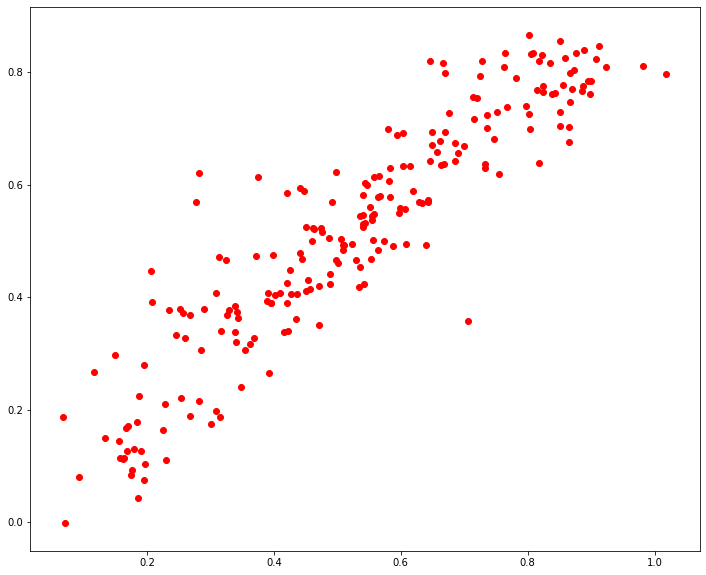

In [211]:
# Scatter plot of y_test and y_pred
plt.figure(figsize=(12,10))
plt.scatter(y_test,y_pred,color='red')

**Now we are getting the Linear Regression Line, which shows that model is correctly evaluated**